In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial, genlaguerre
from scipy.integrate import quad

In [3]:
a0 = 1
r = np.linspace(0,25,100)
Z_array = [1,2,3,4]

In [14]:
def normalized_radial_wavefunction(Z, n, l, r):
    a0 = 1.0    

    norm_factor = np.sqrt((2.0 * Z / n * a0)**3 * (factorial(n - l - 1) / (2.0 * n * factorial(n + l))))
    rho = 2.0 * Z * r / (n * a0)
    exponent = -rho / 2.0
    laguerre_poly = genlaguerre(n - l - 1, 2 * l + 1)(rho)

    radial_wavefunction = norm_factor * rho**l * np.exp(exponent) * laguerre_poly
    radial_dist = radial_wavefunction**2 * r**2

    # print(radial_dist)

    return radial_dist

In [19]:
# Function to integrate and check normalization
def check_normalization(Z, n, l):
    result, error = quad(lambda r: normalized_radial_wavefunction(Z, n, l, r), 0, np.inf)

    print(f'Normalization integral result: {result}')
    print(f'Error estimate of the integral: {error}')

    if np.isclose(result, 1.0, atol=1e-6):
        print('The wavefunction is normalized.')
    else:
        print('The wavefunction is NOT normalized.')

check_normalization(2,1,0)

Normalization integral result: 1.0
Error estimate of the integral: 9.469315373260998e-10
The wavefunction is normalized.


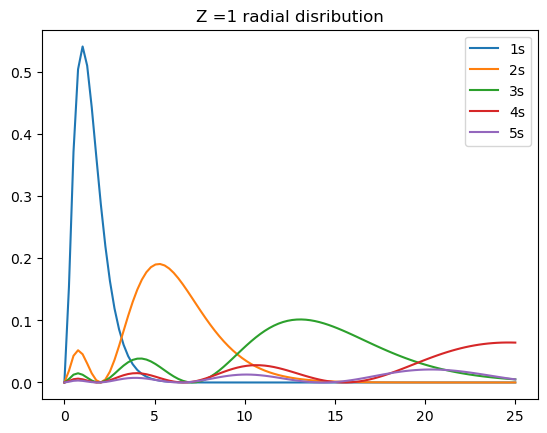

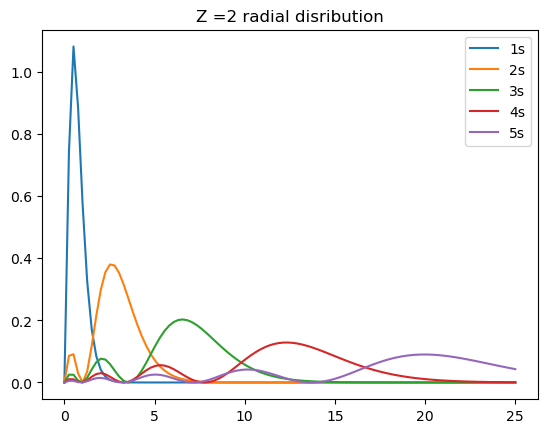

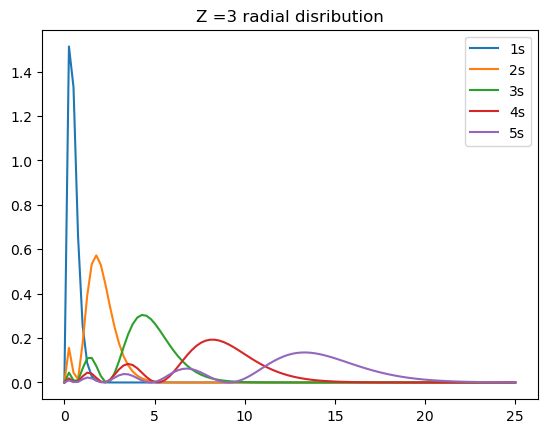

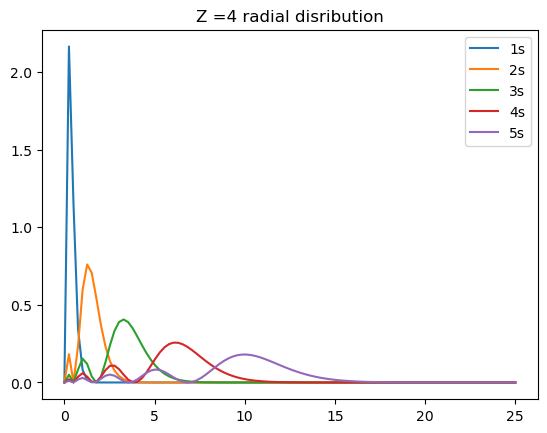

In [5]:
# s-shell
l=0
for Z in Z_array:
    plt.plot(r, normalized_radial_wavefunction(Z, 1, l, r), label = '1s')
    plt.plot(r, normalized_radial_wavefunction(Z, 2, l, r), label = '2s')
    plt.plot(r, normalized_radial_wavefunction(Z, 3, l, r), label = '3s')
    plt.plot(r, normalized_radial_wavefunction(Z, 4, l, r), label = '4s')
    plt.plot(r, normalized_radial_wavefunction(Z, 5, l, r), label = '5s')
    plt.legend()
    plt.title(f'Z ={Z} radial disribution')
    plt.show()

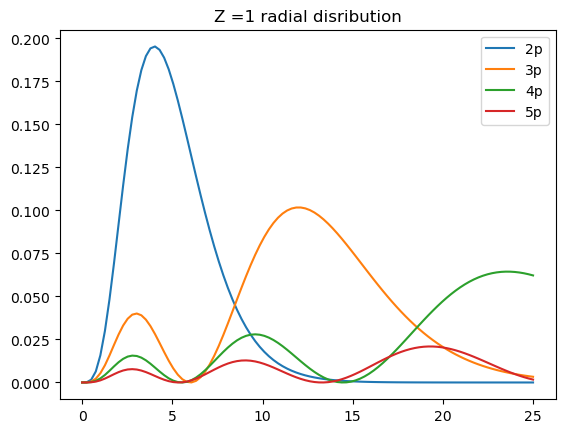

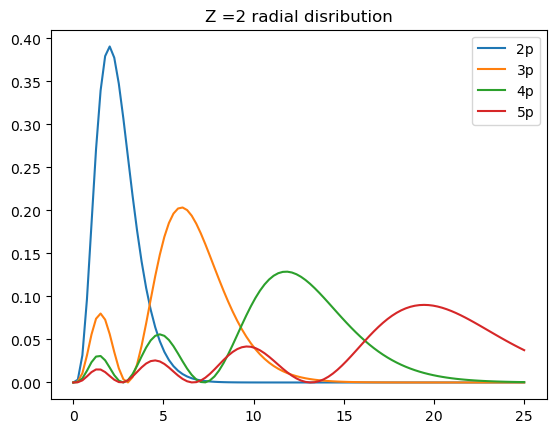

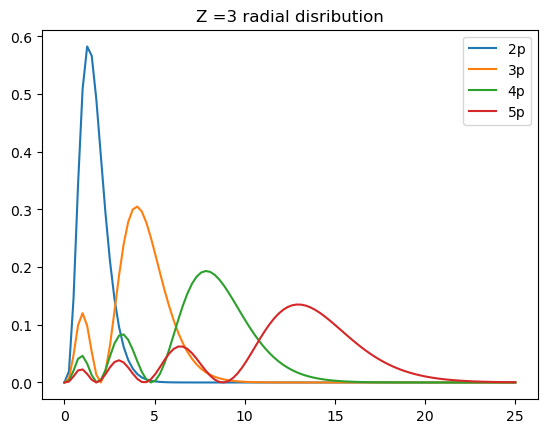

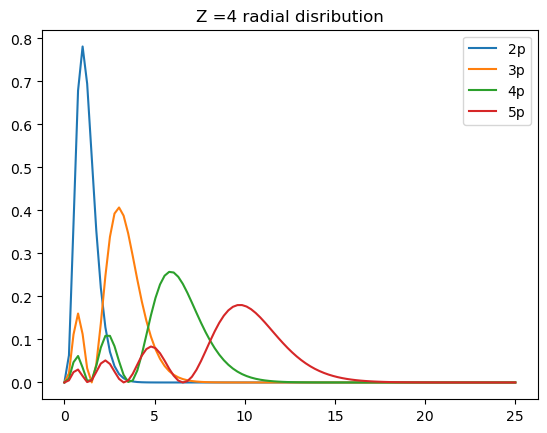

In [6]:
# p-shell
l=1
for Z in Z_array:
    plt.plot(r, normalized_radial_wavefunction(Z, 2, l, r), label = '2p')
    plt.plot(r, normalized_radial_wavefunction(Z, 3, l, r), label = '3p')
    plt.plot(r, normalized_radial_wavefunction(Z, 4, l, r), label = '4p')
    plt.plot(r, normalized_radial_wavefunction(Z, 5, l, r), label = '5p')
    plt.legend()
    plt.title(f'Z ={Z} radial disribution')
    plt.show()

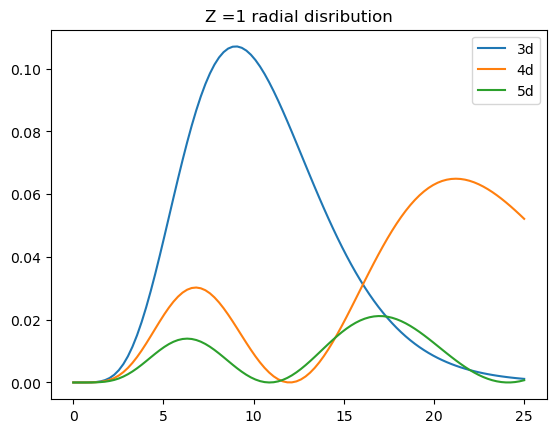

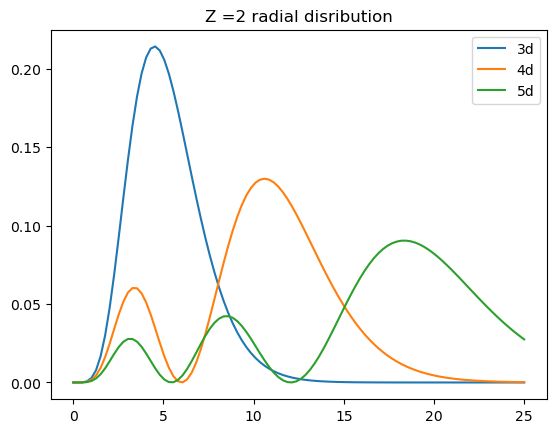

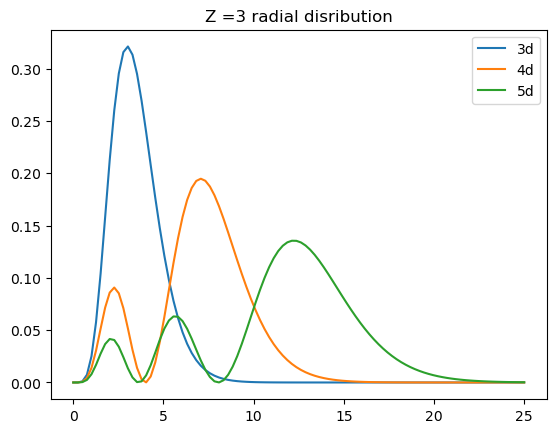

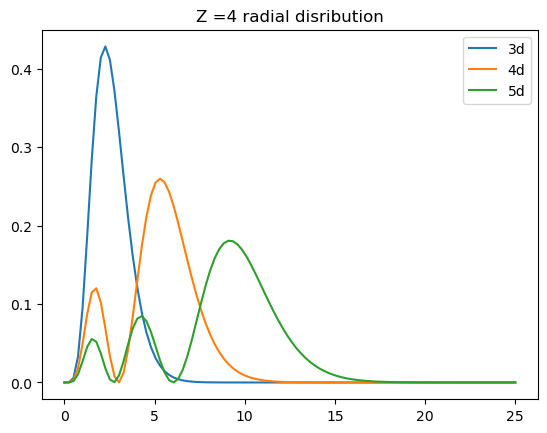

In [7]:
# d-shell
l=2
for Z in Z_array:
    plt.plot(r, normalized_radial_wavefunction(Z, 3, l, r), label = '3d')
    plt.plot(r, normalized_radial_wavefunction(Z, 4, l, r), label = '4d')
    plt.plot(r, normalized_radial_wavefunction(Z, 5, l, r), label = '5d')
    plt.legend()
    plt.title(f'Z ={Z} radial disribution')
    plt.show()


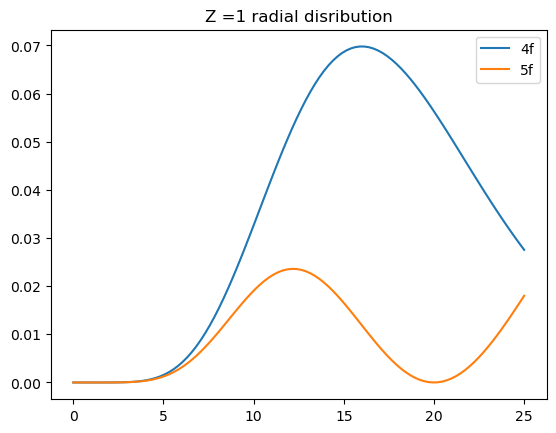

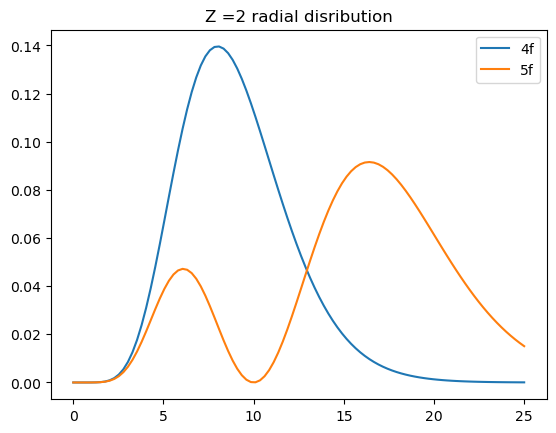

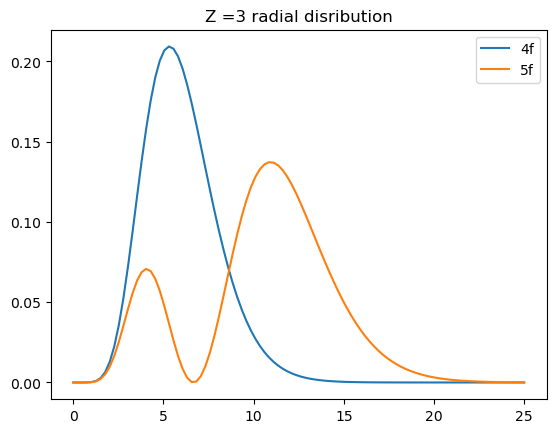

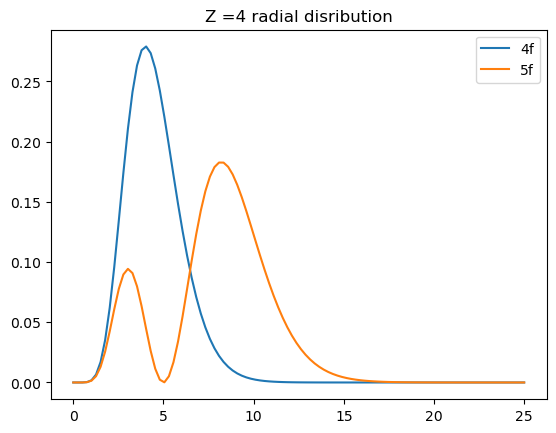

In [8]:
# f-shell
l=3
for Z in Z_array:
    plt.plot(r, normalized_radial_wavefunction(Z, 4, l, r), label = '4f')
    plt.plot(r, normalized_radial_wavefunction(Z, 5, l, r), label = '5f')
    plt.legend()
    plt.title(f'Z ={Z} radial disribution')
    plt.show()

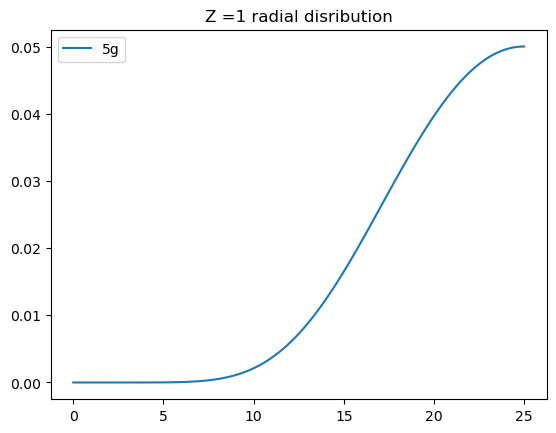

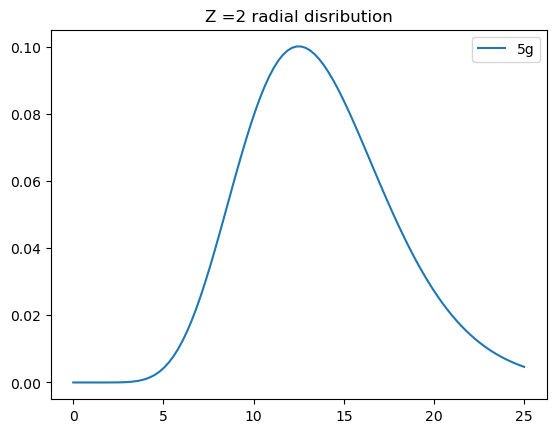

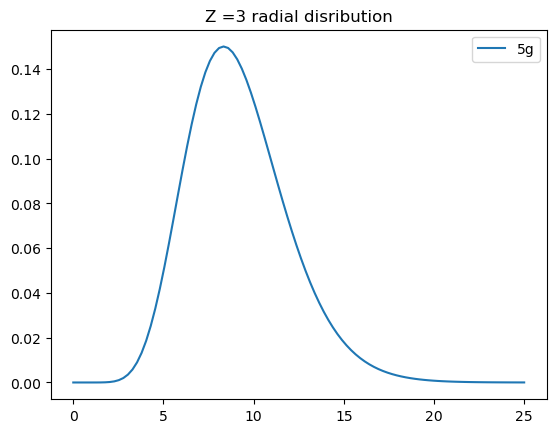

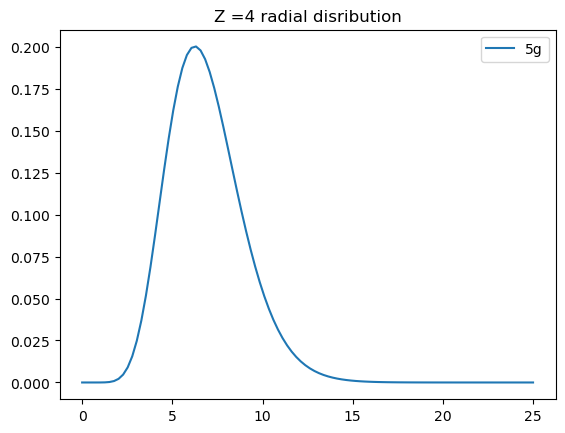

In [12]:
# g-shell
l=4
for Z in Z_array:
    plt.plot(r, normalized_radial_wavefunction(Z, 5, l, r), label = '5g')
    plt.legend()
    plt.title(f'Z ={Z} radial disribution')
    plt.show()

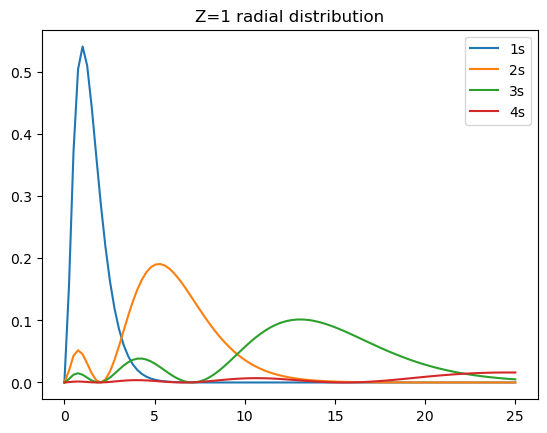

1.0101010101010102
5.303030303030304
13.131313131313131
24.494949494949495


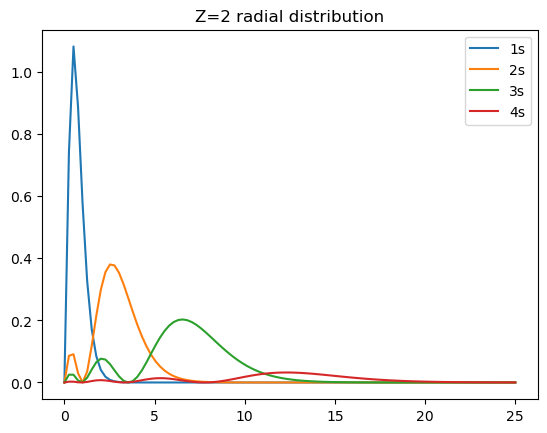

0.5050505050505051
2.5252525252525255
6.565656565656566
12.373737373737374


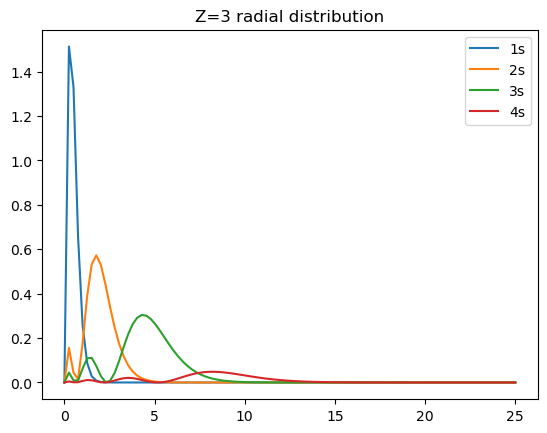

0.25252525252525254
1.7676767676767677
4.292929292929293
8.333333333333334


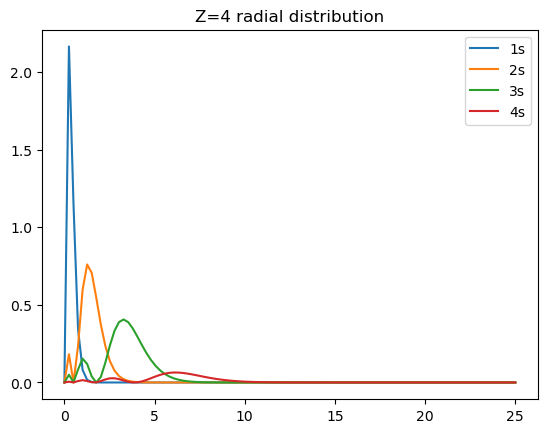

0.25252525252525254
1.2626262626262628
3.282828282828283
6.0606060606060606


In [9]:
# s-shell 
for Z in Z_array:
    one_s = (Z / a0)**(3/2) * 2 * np.exp((-Z * r) / a0)
    two_s = (Z / 2 * a0)**(3/2) * (2 - (Z * r / a0)) * np.exp((-Z * r) / 2 * a0)
    three_s = (Z / 3 * a0)**(3/2) * 2 * (1 - (2/3) * (Z * r / a0) + (2/27) * (Z * r / a0)**2) * np.exp((-Z * r) / 3 * a0)
    four_s = (Z / 4 * a0)**(3/2) * (1 - ((3 * Z * r) / (4 * a0)) + ((1/8) * (Z * r / a0)**2) - (1/192) * (Z * r / a0)**3) * np.exp(-Z * r / 4 * a0)
                

    plt.plot(r, one_s**2*r**2, label = '1s')
    plt.plot(r, two_s**2*r**2, label = '2s')
    plt.plot(r, three_s**2*r**2, label = '3s')
    plt.plot(r, four_s**2*r**2, label = '4s')
    plt.title(f'Z={Z} radial distribution')
    plt.legend()
    plt.show()

    argmax_one_s = r[np.argmax(one_s**2*r**2)]
    argmax_two_s = r[np.argmax(two_s**2*r**2)]
    argmax_three_s = r[np.argmax(three_s**2*r**2)]
    argmax_four_s = r[np.argmax(four_s**2*r**2)]

    print(argmax_one_s)
    print(argmax_two_s)
    print(argmax_three_s)
    print(argmax_four_s)



In [10]:
# # p-shell
# for Z in Z_array:
#     two_p = (Z / 2 * a0)**(3/2) * (1/np.sqrt(3)) * (Z * r / a0) * np.exp((-Z * r) / (2 * a0))

#     first = 8 / (27 * np.sqrt(6))
#     second = (a0 / Z) ** (-3/2)
#     third = (1 - (Z * r / 6*a0))
#     forth = Z * r / a0
#     fifth = np.exp(-Z * r / 3*a0)
#     three_p = first * second * third * forth * fifth 

#     plt.plot(r, two_p**2*r**2, label = '2p')
#     plt.plot(r, three_p**2*r**2, label = '3p')
#     plt.title(f'Z={Z} radial distribution')
#     plt.legend()
#     plt.show()

#     argmax_two_p = r[np.argmax(two_p**2*r**2)]
#     argmax_three_p = r[np.argmax(three_p**2*r**2)]

#     print(argmax_two_p)
#     print(argmax_three_p)


In [11]:
# # d-shell
# for Z in Z_array:
#     three_d = (Z / 3 * a0)**(3/2) * ((2 * np.sqrt(2)) / (27 * np.sqrt(5))) * (Z * r / a0)**2 * np.exp((-Z * r) / (3 * a0))

#     plt.plot(r, three_d**2*r**2, label = '3d')
#     plt.title(f'Z={Z} radial distribution')
#     plt.legend()
#     plt.show()

#     argmax_three_d = r[np.argmax(three_d**2*r**2)]
#     print(argmax_three_d)                               